# Matplotlib und Seaborn: Tipps und Tricks
In diesem Jupyter Notbook möchte ich einige Tipps und Tricks geben und damit auch im Unterricht häufig gestellte Fragen beantworten. Konkret wollen wir hier folgende Themen behandeln:

- Grafik speichern
- Größe von Grafiken im Notebook ändern
- Eine zweite Y-Achse hinzufügen
- Seaborn: Arbeiten mit Farbpaletten
- Matplotlib: 3D-Plots
- Seaborn: Pairplots
- Seaborn: Heatmaps
- Ipwidgets: Interaktive Funktionen

## Grafik speichern
Zuerst wollen wir uns ansehen, wie wir erstellte Diagramme / Grafiken speichern können, um diese in einem anderen Programm verwenden zu können. Am einfachsten ist es natürlich, mit der rechten Maustaste auf das Diagramm zu klicken und "Bild speichern unter..." zu verwenden! Allerdings können wir dadurch nicht die Größe und Auflösung des Bildes definieren. Insbesondere für die Weiterverwendung im Printbereich sollte man eine höhere Auflösung, in der Regel 300dpi, verwenden.

Man kann die Grafiken als folgende Dateitypen speichern:

- png
- svg
- ps
- pdf

Die Grafiken werden im aktuellen Verzeichnis, in dem auch die ipynb-Datei liegt, gespeichert. Man kann aber natürlich auch einen relativen / absoluten Pfad für den Speicherort angeben.

Im Beispiel erstellen wir ein Boxplot-Diagramm mit Daten aus dem berühmten *Titanic* - Datensatz.

*KLeiner Tipp:* *seaborn* stellt einige Datensätze zur Verfügung, unter anderem auch den *Titanic*-Datensatz. Eine Liste aller Datensätze erhält man durch:


In [1]:
import seaborn as sns
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'tips', 'titanic']


In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
df = sns.load_dataset("titanic")
sns.boxplot(x=df["class"], y=df["age"])

# Grafik als png speichern:
plt.savefig("boxplot.png", dpi=300)

# Grafik als ps (PostScript) speichern:
plt.savefig("boxlplot.ps", orientation="portrait", papertype="a4")

# Grafik als PDF speichern
plt.savefig("boxlplot.pdf")


In [3]:
%ls

 Datenträger in Laufwerk C: ist SYSTEM
 Volumeseriennummer: 3076-0923

 Verzeichnis von C:\Users\dea40349\Downloads

27.08.2021  08:28    <DIR>          .
27.08.2021  08:28    <DIR>          ..
27.08.2021  07:33    <DIR>          .ipynb_checkpoints
26.08.2021  08:24       151.872.652 2021_07_27_Robert_Rohschnitt_(HD_1080_-_WEB_(H264_4000)).mp4
26.08.2021  10:16            15.683 2021-08-26 10_16_36-ebis MasterData.png
26.08.2021  10:26             6.422 2021-08-26 10_25_59-ebis MasterData.png
26.08.2021  12:51           456.915 AKAD_Studienbeginn.pdf
26.08.2021  12:46           206.570 Anmeldebestätigung Wolfgang Tröscher.zip
27.08.2021  08:28            12.561 boxlplot.pdf
27.08.2021  08:28            21.951 boxlplot.ps
27.08.2021  08:28            54.765 boxplot.png
26.08.2021  07:58            35.394 boxplot.ps
27.08.2021  08:25            25.268 boxplot2.png
27.08.2021  08:25            26.395 boxplot3.png
27.08.2021  08:28         1.692.804 Matplotlib und Seaborn - Tipps und Trick

Manchmal werden beim Speichern von Grafiken Teile des Bildes abgeschnitten, zum Beispiel bei großen Überschriften:

In [4]:
sns.boxplot(x=df["class"], y=df["age"])
plt.title("Große Überschrift", fontsize=50)
plt.savefig("boxplot2.png")


Dies kann man fixen, wenn man das Argument "bbox_inches" auf den Wert "tight" setzt:

In [5]:
plt.savefig("boxplot3.png", bbox_inches="tight")
plt.close()

## Größe von Grafiken im Jupyter Notebook ändern

Bei Grafiken mit viel Inhalt möchte man diese im Notebook vielleicht größer darstellen. Im folgenden Beispiel verwenden wir den Datensatz *diamonds* und erstellen einen Scatterplot. Diesen formatieren wir noch etwas, indem wir einen Matplotlib-Style nutzen und die Farbpalette auf *inferno* setzen. Da der Datensatz sehr viele Beobachtungen enthält, wählen wir zufällig 2.000 aus dem Datensatz aus.

Die Größe der Grafik ändern wir mit

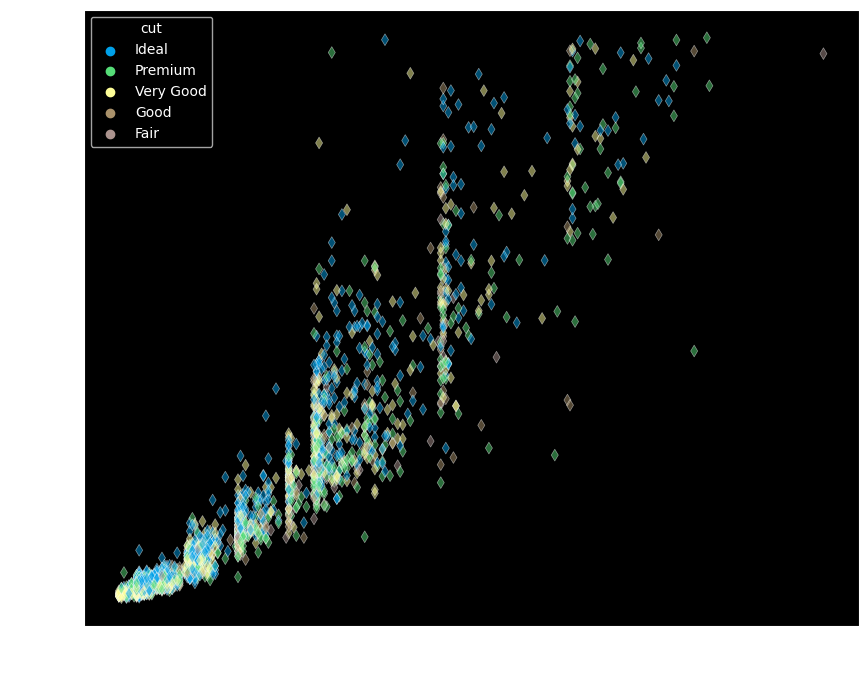

In [6]:
import numpy as np

# Größe ändern
plt.figure(figsize=(10,8))

df = sns.load_dataset("diamonds").sample(2000)
plt.style.use("dark_background")
sns.scatterplot(x=df.carat, y=df.price, hue=df.cut, marker="d", alpha=0.5,  palette="terrain")
plt.show()

 ## Eine zweite Y-Achse hinzufügen

Stellt man zwei Wertereihen gegenüber, die sich in ihren Werten stark unterscheiden, so ist eine einzige Y-Achse zu wenig. Im folgenden Beispiel stellen wir die Werte für die Funktion $x^2$ mit den Werten der Funktion $\sqrt{x}$ gegenüber:

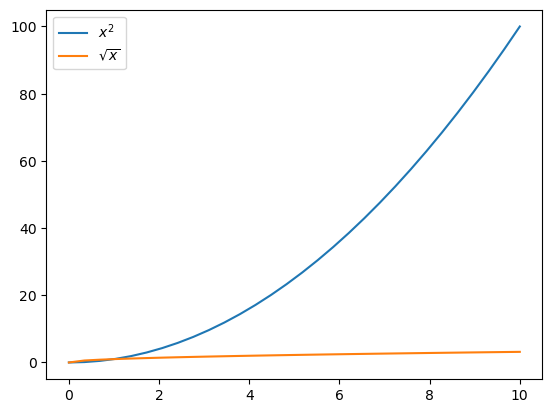

In [7]:
# Style wieder zurücksetzen
plt.style.use("default")

x = np.linspace(0,10,30)
y1 = x**2
y2 = np.sqrt(x)

plt.plot(x, y1, label=r"$x^2$")
plt.plot(x, y2, label=r"$\sqrt{x}$")
plt.legend()
plt.show()

Wir sehen, dass der Graph der Funktion  $\sqrt{x}$ schon fast als eine Parallele zur X-Achse dargestellt wird, weil die Y-Achse mit einem maximalen Wert von 100 zu "groß" ist. Also müssen wir eine zweite Y-Achse einführen: Wir erstellen mit *subplots* einen "Teilplot" (wie wir ihn im letzten Video schon verwendet haben, um mehrere Teilplots in einem Diagramm zusammenzufassen). Auf dem Objekt für das erste Diagramm *ax1* rufen wir die Methode *twinx* auf. Diese liefert uns eine weitere Achse mit einer eigenen Skalierung, auf der wir dann die Daten der Wurzelfunktion darstellen können:

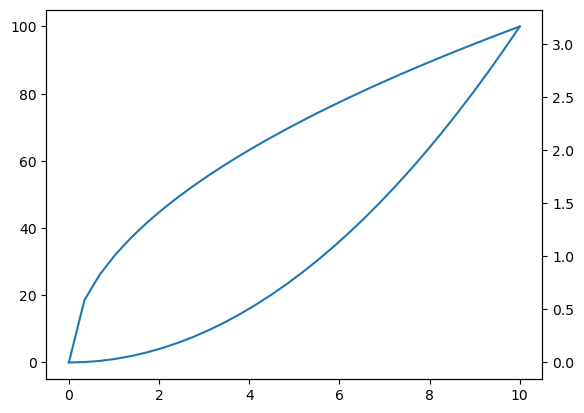

In [8]:
fig, ax1 = plt.subplots()
ax1.plot(x, y1)
ax2=ax1.twinx()
ax2.plot(x, y2)

plt.show()

Allerdings wissen wir aktuell noch nicht, welcher Graph zu welcher Funktion gehört. Wir wollen die Achsen, die Achsenbeschriftungen und auch die Graphen entsprechend einfärben und auch noch eine Legende hinzufügen. Die Legende ist etwas aufwändig. Da wir es mit zwei unterschiedlichen Objekten für die Diagramme zu tun haben, müssen wir jedem Diagramm eine Legend hinzufügen (wie gewohnt mit *label*). Die *plot*-Funktion liefert eine Liste zurück, die ein Objekt der Klasse *Line2D* enthält. Diese beiden Listen vereinigen wir mit dem + - Operator (*lines = l1 + l2*). In einer List-Comprehension holen wir die *label*-Text aus den Objekten (mit der Methode *get_label()*). Diese Texte geben wir dann als Legende im Diagramm *ax1* aus (es würde auch mit *ax2* funktionieren):

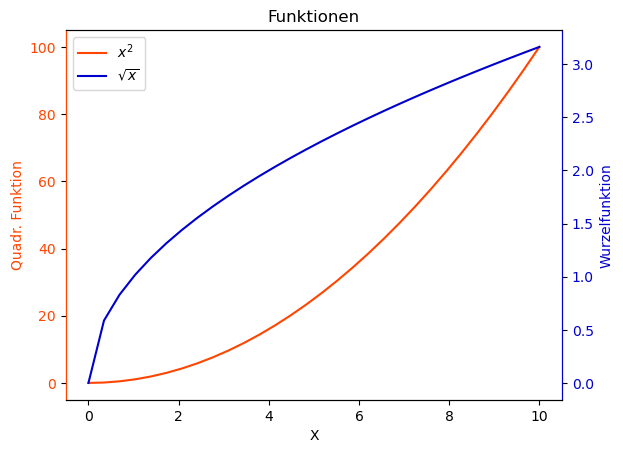

In [9]:
fig, ax1 = plt.subplots()
ax2=ax1.twinx()

color_ax1 = "orangered"
color_ax2 = "mediumblue"

l1 = ax1.plot(x, y1, color=color_ax1, label=r"$x^2$")
l2 = ax2.plot(x, y2, color=color_ax2, label=r"$\sqrt{x}$")

lines = l1 + l2

labels = [l.get_label() for l in lines]
ax2.legend(lines, labels)

ax1.set_ylabel("Quadr. Funktion", color=color_ax1)
ax2.set_ylabel("Wurzelfunktion", color=color_ax2)
ax1.set_xlabel("X")

ax2.spines["left"].set_color(color_ax1)
ax2.spines["right"].set_color(color_ax2)

ax1.tick_params(axis="y", labelcolor=color_ax1)
ax2.tick_params(axis="y", labelcolor=color_ax2)

plt.title("Funktionen")

plt.show()

## Seaborn: Farbpaletten


Möchte man "schickere" Diagamme erstellen, so bietet sich *seaborn* an. Matplotlib-Diagramme kann man zwar auch ansehnlich designen, *seaborn* liefert aber schon von Haus aus Diagramme, die sich zum Beispiel auch für Präsentationen eignen. Außerdem bietet es nahezu unendlich viele Möglichkeiten der Farbgestaltung. Einige davon wollen wir uns hier näher anschauen.

Farben müssen nicht nur jede für sich "hübsch" sein (was immer das ist), sie müssen auch zueinander passen. Sich mit der Farbenlehre zu beschäftigen lohnt sich! *seaborn* bietet bereits jede Menge Farb-Paletten, die Farben enthalten, die man in einem Diagramm verwenden kann ohne dass es den Augen schmerzt!

In [10]:
# Gib aktuelle Palette aus
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [11]:
# Gib bestimmte Palette aus
sns.color_palette("terrain")

[(0.011764705882352955, 0.5764705882352941, 0.9764705882352941),
 (0.1450980392156863, 0.8290196078431373, 0.42901960784313725),
 (0.7098039215686275, 0.9419607843137255, 0.5419607843137255),
 (0.8549019607843137, 0.8142745098039216, 0.5216470588235294),
 (0.5725490196078431, 0.45286274509803925, 0.36917647058823533),
 (0.7176470588235294, 0.6385882352941177, 0.6216470588235294)]

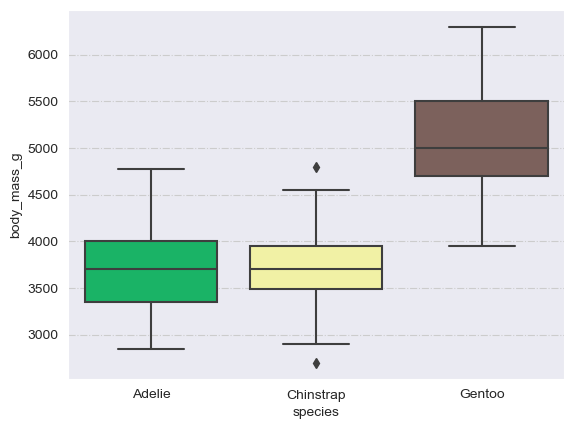

In [12]:
df = sns.load_dataset("penguins")

sns.set_style("darkgrid", {"grid.color": "#CCCCCC", "grid.linestyle": "-."})

sns.boxplot(x="species", y="body_mass_g", data=df, palette="terrain")
plt.show()

Welche Paletten gibt es? Jede Menge! Um eine Auflistung aller möglichen Paletten zu erhalten, setzt man einfach einen ungültigen Wert - die Fehlermeldung sagt uns dann, welche Werte gültig gewesen wären: 

In [13]:
import traceback
try:
    sns.color_palette("xxxx")
except ValueError as err:
    traceback.print_exc()


Traceback (most recent call last):
  File "C:\Users\dea40349\Anaconda3\lib\site-packages\seaborn\palettes.py", line 206, in color_palette
    palette = mpl_palette(palette, n_colors, as_cmap=as_cmap)
  File "C:\Users\dea40349\Anaconda3\lib\site-packages\seaborn\palettes.py", line 443, in mpl_palette
    cmap = mpl.cm.get_cmap(name)
  File "C:\Users\dea40349\Anaconda3\lib\site-packages\matplotlib\cm.py", line 190, in get_cmap
    _api.check_in_list(sorted(_cmap_registry), name=name)
  File "C:\Users\dea40349\Anaconda3\lib\site-packages\matplotlib\_api\__init__.py", line 126, in check_in_list
    raise ValueError(
ValueError: 'xxxx' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Past

Zum Beispiel die Palette *winter*:

In [14]:
sns.color_palette("winter")


[(0.0, 0.1411764705882353, 0.9294117647058824),
 (0.0, 0.28627450980392155, 0.8568627450980393),
 (0.0, 0.42745098039215684, 0.7862745098039216),
 (0.0, 0.5725490196078431, 0.7137254901960784),
 (0.0, 0.7137254901960784, 0.6431372549019607),
 (0.0, 0.8588235294117647, 0.5705882352941176)]

In [15]:
sns.color_palette("spring")

[(1.0, 0.1411764705882353, 0.8588235294117648),
 (1.0, 0.28627450980392155, 0.7137254901960784),
 (1.0, 0.42745098039215684, 0.5725490196078431),
 (1.0, 0.5725490196078431, 0.4274509803921569),
 (1.0, 0.7137254901960784, 0.28627450980392155),
 (1.0, 0.8588235294117647, 0.14117647058823535)]

Die Paletten mit einem "\_r" am Ende entsprechen der Palette gleichen Namens ohne "\_r", aber in umgedrehter Reihenfolge (reversed).

In [16]:
sns.color_palette("spring_r")

[(1.0, 0.8588235294117648, 0.1411764705882353),
 (1.0, 0.7137254901960784, 0.28627450980392155),
 (1.0, 0.5725490196078431, 0.42745098039215684),
 (1.0, 0.4274509803921569, 0.5725490196078431),
 (1.0, 0.28627450980392155, 0.7137254901960784),
 (1.0, 0.14117647058823535, 0.8588235294117647)]

Standardmäßig werden nur die ersten 6 Farben der Palette ausgegeben. Man kann als zweites Argument auch zusätzliche Farbena aus der Palette anzeigen lassen.

In [17]:
sns.color_palette("magma", 20)

[(0.024792, 0.020715, 0.100676),
 (0.074257, 0.052017, 0.20266),
 (0.135053, 0.068391, 0.315),
 (0.211718, 0.061992, 0.418647),
 (0.291366, 0.064553, 0.475462),
 (0.372116, 0.092816, 0.499053),
 (0.445163, 0.122724, 0.506901),
 (0.519045, 0.150383, 0.507443),
 (0.594508, 0.175701, 0.501241),
 (0.671349, 0.200133, 0.487358),
 (0.754737, 0.228772, 0.462509),
 (0.828886, 0.262229, 0.430644),
 (0.8947, 0.309773, 0.393995),
 (0.944006, 0.377643, 0.365136),
 (0.973381, 0.46152, 0.361965),
 (0.989363, 0.557873, 0.391671),
 (0.99581, 0.646344, 0.441361),
 (0.997341, 0.733545, 0.505167),
 (0.995424, 0.819875, 0.57914),
 (0.991332, 0.905763, 0.661309)]

Man kann auch eigene Farbpaletten definieren. Dazu gibt man Farben als "Zwischenstufen" sowie die Anzahl der Farbübergänge:

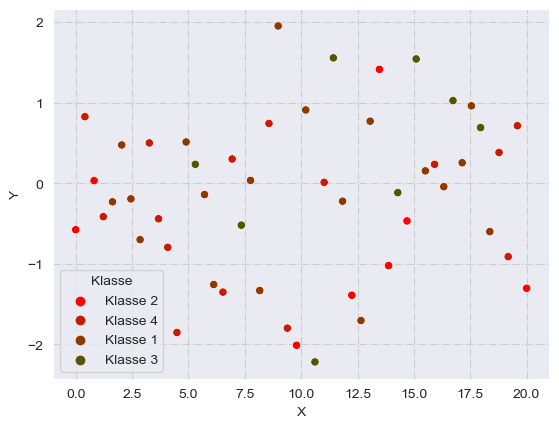

In [18]:
import numpy as np
import pandas as pd

my_palette = sns.blend_palette(["red", "green", "blue"], 10)
classes = ["Klasse 1", "Klasse 2", "Klasse 3", "Klasse 4"]
x = np.linspace(0,20,50)
y = np.random.normal(size=50)
cl = np.random.choice(classes, 50)

df = pd.DataFrame({"X": x, "Y":y, "Klasse":cl})

sns.scatterplot(x="X", y="Y", hue="Klasse", data=df, palette=my_palette[:4])
plt.show()

## 3D-Plots

Mit Matplotlib kann man auch 3D-Plots erstellen, die sogar interaktiv sind! Im Beispiel werden 3 Spalten des IRIS-Datensatzes geplottet. Damit die Grafik im Notebook interaktiv wird, müssen wir *%matplotlib notebook* angeben.

<IPython.core.display.Javascript object>


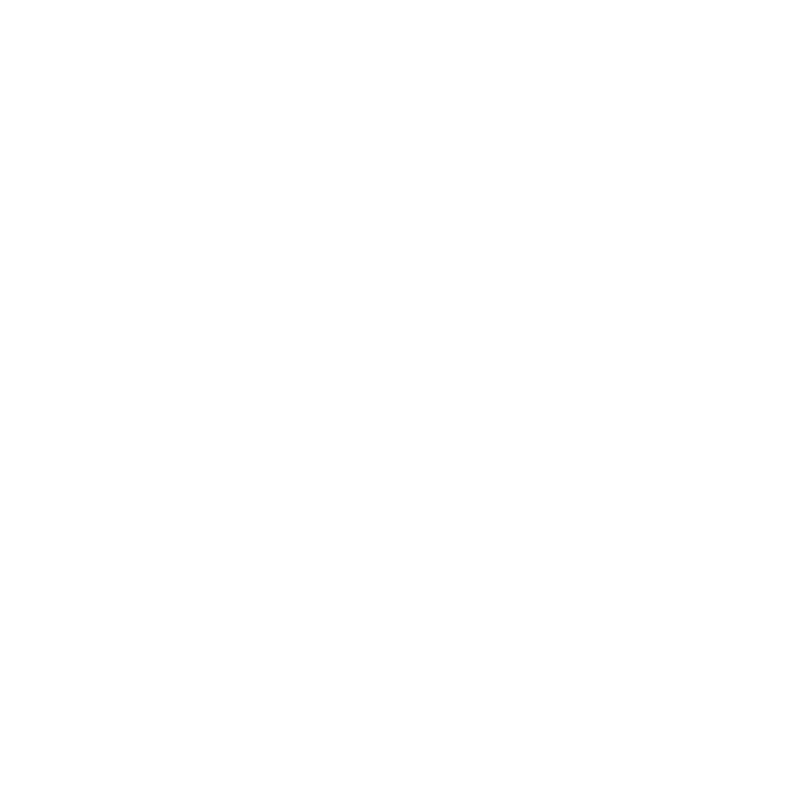

<IPython.core.display.Javascript object>


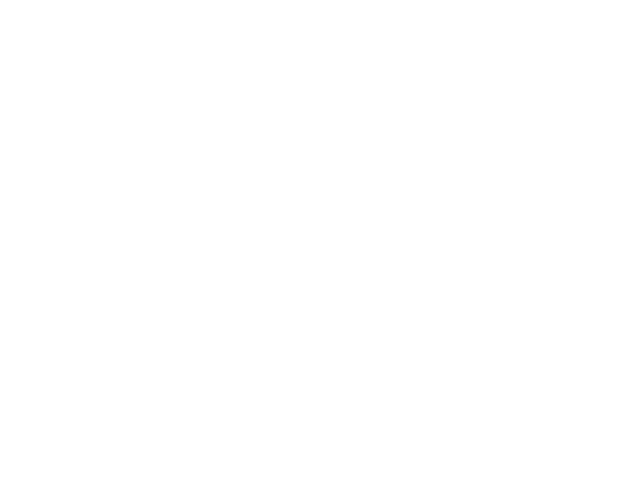

In [19]:
%matplotlib notebook

plt.figure(figsize=(8,8))

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

df = sns.load_dataset("iris")
sns.set(style = "whitegrid")


fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = df.sepal_length
y = df.sepal_width
z = df.petal_length

ax.set_xlabel("Sepal Length")
ax.set_ylabel("Sepal Width")
ax.set_zlabel("Petal Length")

ax.scatter(x[df[df.species=="setosa"].index], y[df[df.species=="setosa"].index], z[df[df.species=="setosa"].index], 
           label="Setosa")
ax.scatter(x[df[df.species=="virginica"].index], y[df[df.species=="virginica"].index], z[df[df.species=="virginica"].index],
          label="Virginica")
ax.scatter(x[df[df.species=="versicolor"].index], y[df[df.species=="versicolor"].index], z[df[df.species=="versicolor"].index],
          label="Versicolor")

plt.legend()
plt.title("3D-Plot IRIS")

plt.show()

## Pairplots
Um einen schnellen Überblick über einen Datensatz zu erhalten kann man mit *seaborn* einen Pairplot erstellen:

In [20]:
df = sns.load_dataset("mpg")
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


<Figure size 288x288 with 0 Axes>

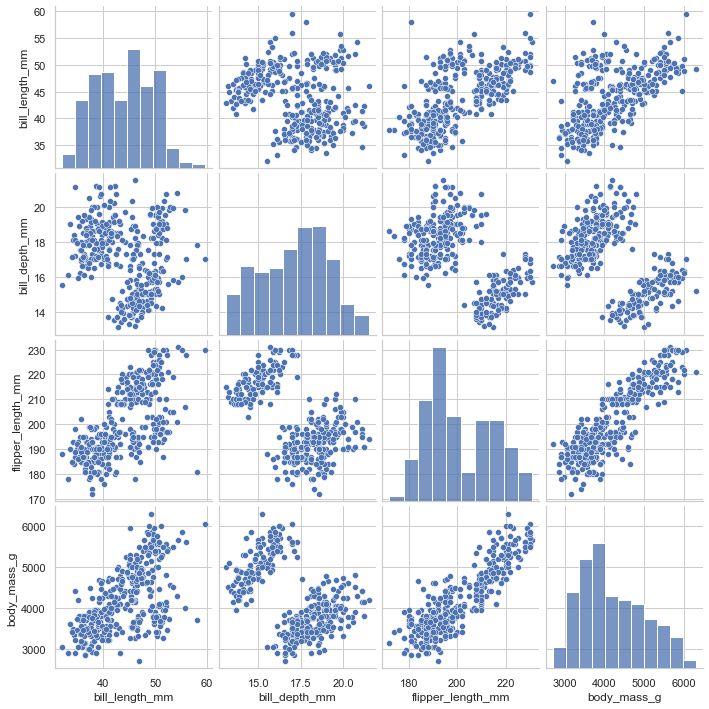

In [21]:
%matplotlib inline
df = sns.load_dataset("penguins")
plt.figure(figsize=(4,4))
sns.pairplot(df);


Standardmäßig wird in der Diagonalen ein Histogramm, bei den anderen Feldern ein Scatterplot dargestellt. Möchte man auch in die Scatterplots gleich eine Regressionsgerade einzeichnen lassen, so gibt man dies mit der *kind*-Option an:

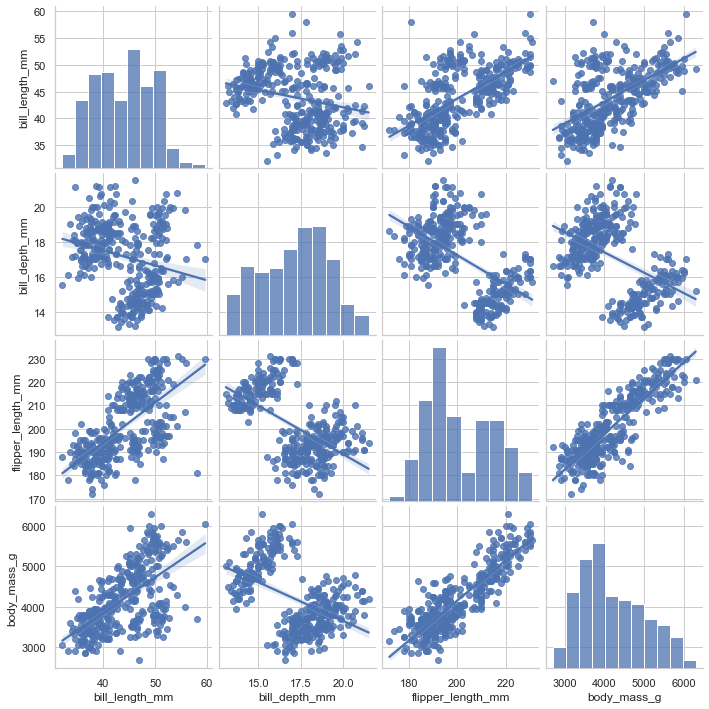

In [22]:
sns.pairplot(df, kind="reg");

Statt eines Histogramms in den Diagonalen kann man auch einen Dichteplot ausgeben lassen:

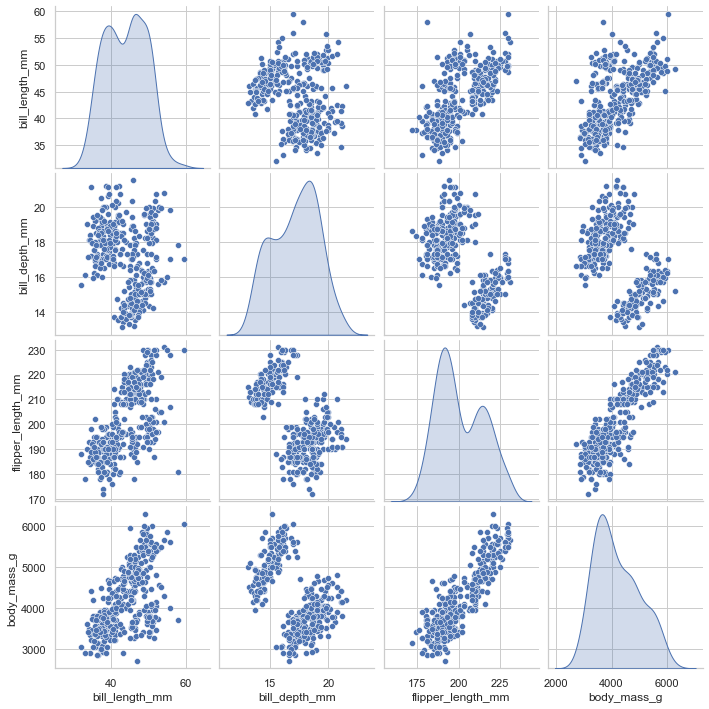

In [23]:
sns.pairplot(df, diag_kind="kde");

Im Pairplot werden nur nummerische Daten dargestellt. Mit der Option *hue* kann man auch die kategoriale Variable *species* aus dem *penguins*-Datensatz verwenden:

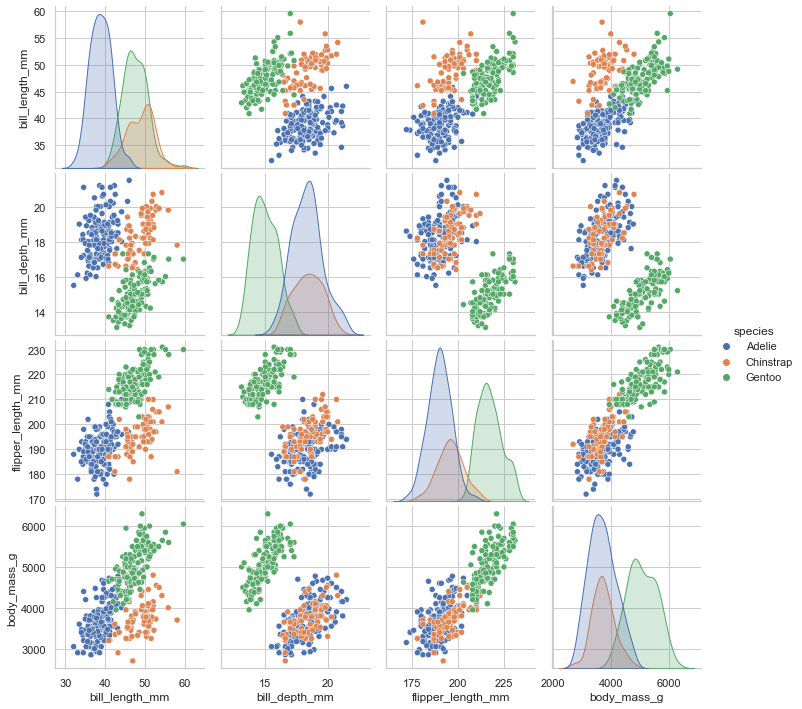

In [24]:
sns.pairplot(df, hue="species");

## Heatmaps
Heatmaps erlauben es, tabellarische Daten mit Hilfe einer farblichen Darstellung der Daten sehr einfach visuell darzustellen. Angenommen wir haben die Umsatzzahlen von Produkten in verschiedenen Filialen in einem DataFrame gespeichert und geben diesen aus:

In [25]:
umsatz = pd.DataFrame({"Obst_Gemüse" : [5320, 1230, 1450, 110, 831],
                       "Milchprodukte" : [230, 3410, 1200, 210, 9102],
                       "Getränke" : [2340, 8710, 4501, 3209, 1232],
                       "Backwaren": [1212, 231, 1145, 974, 891]},
                     index=["Filiale A", "Filiale B", "Filiale C", "Filiale D", "Filiale E"])

umsatz

,Obst_Gemüse,Milchprodukte,Getränke,Backwaren
Filiale A,5320,230,2340,1212
Filiale B,1230,3410,8710,231
Filiale C,1450,1200,4501,1145
Filiale D,110,210,3209,974
Filiale E,831,9102,1232,891


Das sind jetzt nur relativ wenige Zahlen, ist ja schon jetzt relativ unübersichtlich. In einer Heatmap werden diese Zahlen nun farblich codiert und wir erkennen schnell, dass zum Beispiel in der Filiale E bei den Milprodukten im Vergleich zu den anderen Filialen relativ viel Umsatz erzielt wurde (je heller die Farbe, desto höher der Umsatz). In den Filialen A und D wurde dagegen wenig Umsatz erzielt (dunkle Farbe).

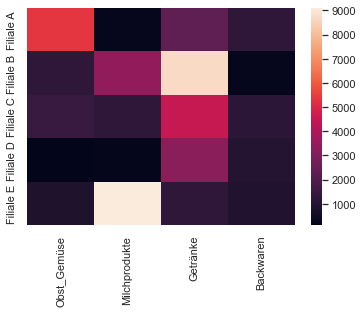

In [26]:
sns.heatmap(umsatz);

Selbstverständlich kann man auc hier wieder vielfältige Formatierung durchführen. Zum Beispiel kann man die Farbpalette ändern:

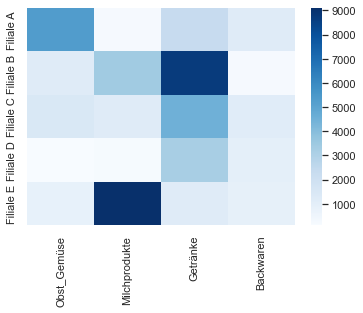

In [27]:
sns.heatmap(umsatz, cmap="Blues");

Man kann auch die Werte in die Heatmap einfügen:

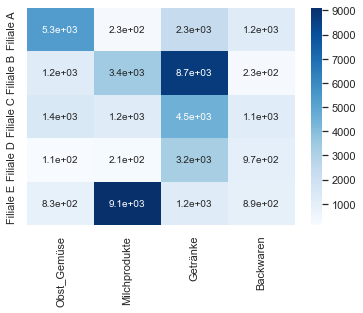

In [28]:
sns.heatmap(umsatz, cmap="Blues", annot=True);

Allerdings wird standardmäßig die wissenschaftliche Notation verwendet. Aber man kann auch eine Formatierung definieren:

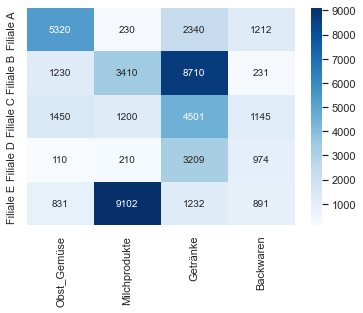

In [29]:
sns.heatmap(umsatz, cmap="Blues", annot=True, fmt=".0f");

Zwischen den "Kästchen" kann auch eine Linie eingefügt werden.

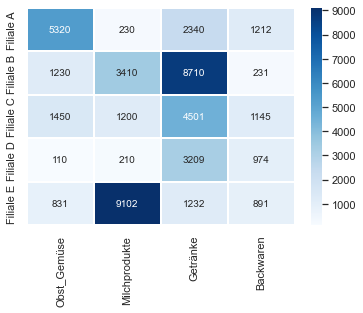

In [30]:
sns.heatmap(umsatz, cmap="Blues", annot=True, fmt=".0f", linewidths=2);

Die Größe der Schrift lässt sich ebenso definieren.

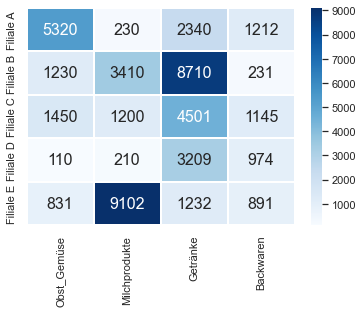

In [31]:
sns.heatmap(umsatz, cmap="Blues", annot=True, fmt=".0f", linewidths=2, annot_kws={"fontsize": 16});

Gerne wird ein Heatmap auch mit den Korrelatioskoeffizienten erstellt, sodass man einen schnellen Überblick über die Korrelation zwischen den einzelnen Features eines Datensatzes erhält. Im Beispiel erstellen wir eine solche Heatmap und zwar derart, dass die redundanten Werte (ein Korrealtionsplot ist symmetrisch zur Diagonalen) nicht mehr dargestellt werden, sondern nur die untere Dreiecksmatrix. Wir verwenden hierfür den IRIS-Datensatz.

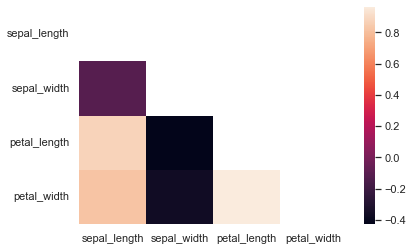

In [32]:
df = sns.load_dataset("iris")  # Datensatz laden
mask = np.ones_like(df.corr())  # Erstelle eine Matrix mit 1en in der Größe der Koeffizienten-Matrix
mask = np.triu(mask)  # Nur die untere Dreicksmatrix mit 1en, sonst 0

sns.heatmap(df.corr(), mask=mask)
plt.show()

## Ipwidgets: Interaktive Funktionen
Interaktive Diagramme können mit Hilfe des Widgets *Ipwidgets* erstellt werden. Angeonommen wir wollen eine Normalverteilung mit unterschiedlichen Erwartungswerten $\mu$ und Standardabweichungen $\sigma$ visualisieren:

In [33]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))

def visualize_normal_distribution(mu=0, sigma=1, xmin=-3, xmax=3, color="blue"):
    x = np.linspace(mu-4*sigma, mu+4*sigma, 50)
    y = stats.norm.pdf(x, mu, sigma)
    
    plt.plot(x, y)
    plt.xlim(xmin, xmax)
    plt.title("Normalverteilung")
    plt.fill_between(x, y, color=color)
    plt.show()
    


<Figure size 576x576 with 0 Axes>

Dieser Funktion können wir mit *Ipwidgets* dynamisch Werte übergeben:

In [34]:
import ipywidgets as widgets
widgets.interact(visualize_normal_distribution, mu=(-10,10), sigma=(1, 10), color=["red", "green", "blue"],
                 xmin=(-20,0), xmax=(0,20));

interactive(children=(IntSlider(value=0, description='mu', max=10, min=-10), IntSlider(value=1, description='s…